# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [2]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [3]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

# Bloom filter helper code:

# BST helper code:
class NodeBST():
    def __init__(self, value):
        self.value = value
        self.right_node=None
        self.left_node  = None
      
    def insert(self, value):
        if value > self.value and self.right_node:
            return self.right_node.insert(value)
        elif value < self.value and self.left_node:
            return self.left_node.insert(value)
        elif value > self.value:
            self.right_node = NodeBST(value)
            return True
        elif value < self.value:
            self.left_node = NodeBST(value)
            return True
        return False
      
    def search(self, value):
        if value > self.value and self.right_node:
            return self.right_node.search(value)
        elif value < self.value and self.left_node:
            return self.left_node.search(value)
        
        elif (value == self.value):
            return True
        else:
            return False
    
    def print_tree(self):
        
        print(self.value)
        
        if self.left_node:
            self.left_node.print_tree()
            
        if self.right_node:
            self.right_node.print_tree()

In [4]:
# Balanced Tree helper code

# Time complexity = O(logN)
# Space complexity = O(n)
class BalancedNode:
    def __init__(self, value):
        self.left = None
        self.parent = None
        self.right = None
        self.value = value
        self.colour = "R"



In [5]:
class Node:
    def __init__(self, data=None, next=None):
        self.data = data
        self.next = next

class SequentialSearchSet(AbstractSet):
    def __init__(self):
        self.head = None

    def insertElement(self, element):
        node = Node(element, self.head)
        self.head = node
    
    #def insertElement(self, element):
        #if self.head is None:
            #self.head = Node(element, None)
            #return
            
        
        #node = self.head
        #while node.next is not None:
            #node = node.next
        
        #node.next = Node(element, None)


    def searchElement(self, element):
        search_node = self.head
        while search_node is not None:
            if search_node.data == element:
                return True
            search_node = search_node.next
        return False
    
    def print(self):
        if self.head is None:
            print("Empty linked list")
            return

        node = self.head # Iterator will start at the beginning of the linked list
        linked_list_string = '' # Linked list string to print out the list of elements
        while node is not None:
            linked_list_string += str(node.data) + '-->'
            node = node.next # Following the linked list and iterating through elements one by one

        print(linked_list_string)


In [6]:
linked_list = SequentialSearchSet()
linked_list.insertElement(5)
linked_list.insertElement(2)
linked_list.print()
linked_list.searchElement(5)

2-->5-->


True

Use the cell below to implement the requested API by means of **sequential search**.

In [7]:
class SequentialSearchSet(AbstractSet):
    
    def __init__(self):
        self.words = []
                
    def insertElement(self, element):
        inserted = False
        for value in self.words:
            if value == element:
                return inserted
        self.words.append(element)
        inserted = True
      
        return inserted
    

    def searchElement(self, element):
        
        found = False
        for value in self.words:
            if value == element:
                found = True
                return found
        
        return found

Use the cell below to implement the requested API by means of **binary search tree**.

In [8]:
class BinarySearchTreeSet(AbstractSet):
    
    def __init__(self):
        self.root = NodeBST("0")
        
    def insertElement(self, element):
        inserted = False
        inserted = self.root.insert(element)
        return inserted

    def searchElement(self, element):     
        found = False
        found = self.root.search(element)
        return found    

Use the cell below to implement the requested API by means of **balanced search tree**.

In [9]:

class BalancedSearchTreeSet(AbstractSet):
    def __init__(self): # code to initialize the tree structure 
        self.empty = BalancedNode("")
        self.empty.colour = "B"
        self.empty.left = None
        self.empty.right = None
        self.root = self.empty
        

    def insertElement(self, element): 
        # This function adds the node to be inserted like a binary tree
        # It gives it the initial colour of red, but if it is the root it changes the colour to black
        # Returns inserted if no further operations are needed (best case scenario), otherwise calls another function
        inserted = False
        node = BalancedNode(element)
        node.parent = None
        node.value = element
        node.colour = "R"
        node.left = self.empty
        node.right = self.empty

        tempval = None
        rt = self.root

        check = self.searchElement(element)
        if check==True:
            inserted = False
            return inserted

        while rt != self.empty:
            tempval = rt
            if node.value < rt.value:
                rt = rt.left
            else:
                rt = rt.right

        node.parent = tempval

        if tempval == None:
            self.root = node
        elif node.value < tempval.value:
            tempval.left = node
        else:
            tempval.right = node

        if node.parent == None:
            node.colour = "B"
            inserted = True
            return inserted

        if node.parent.parent == None:
            inserted = True
            return inserted

        self.insertcontinue(node)
        return inserted

    def search(self, node, value):
        # Searches similarly to a binary tree
        found = False
        if node == self.empty:
            return found
        elif value == node.value:
            found = True
            return found
        if value < node.value:
            return self.search(node.left, value)
        return self.search(node.right, value)

    def leftrotate(self, rotateval):
        # Rotates the tree to the left around a particular node
        rchild = rotateval.right
        rotateval.right = rchild.left
        if rchild.left != self.empty:
            rchild.left.parent = rotateval
        rchild.parent = rotateval.parent
        if rotateval.parent == None:
            self.root = rchild
        elif rotateval == rotateval.parent.left:
            rotateval.parent.left = rchild
        else:
            rotateval.parent.right = rchild
        rchild.left = rotateval
        rotateval.parent = rchild

    def rightrotate(self, rotateval):
        # Rotates the tree to the right around a particular node
        lchild = rotateval.left
        rotateval.left = lchild.right
        if lchild.right != self.empty:
            lchild.right.parent = rotateval
        lchild.parent = rotateval.parent
        if rotateval.parent == None:
            self.root = lchild
        elif rotateval == rotateval.parent.right:
            rotateval.parent.right = lchild
        else:
            rotateval.parent.left = lchild
        lchild.right = rotateval
        rotateval.parent = lchild

    def colourswap(self, a, l):
        # If called, this changes the colour of the grandparent of the node being colourswapped to RED
        # It also changes the colour of the aunt and the parent to BLACK
        if a.colour == "R":
            a.colour = "B"
            l.parent.colour = "B"
            l.parent.parent.colour = "R"
            l = l.parent.parent

    def insertcontinue(self, leaf):
        # This function is only called if there are 2 red nodes adjacent to one another
        # It then locates the aunt, and depending on the aunts colour it performs actions to self-balance itself
        while leaf.parent.colour == "R":
            if leaf.parent == leaf.parent.parent.right:
                # This line differentiates the left and right subtrees of the main root
                aunt = leaf.parent.parent.left
                if aunt.colour == "R":
                    # If the aunt is red, a colourswap is conducted
                    self.colourswap(aunt, leaf)
                    leaf = leaf.parent.parent
                else:
                    #Otherwise, a right-left rotation is conducted
                    if leaf == leaf.parent.left:
                        leaf = leaf.parent
                        self.rightrotate(leaf)
                    leaf.parent.colour = "B"
                    leaf.parent.parent.colour = "R"
                    self.leftrotate(leaf.parent.parent)
            else:
                # This section operates with the right subtree of the main root
                aunt = leaf.parent.parent.right
                if aunt.colour == "R":
                    self.colourswap(aunt, leaf)
                    leaf = leaf.parent.parent
                else:
                    # If the aunt is black, then a left-right rotation is conducted
                    if leaf == leaf.parent.right:
                        leaf = leaf.parent
                        self.leftrotate(leaf)
                    leaf.parent.colour = "B"
                    leaf.parent.parent.colour = "R"
                    self.rightrotate(leaf.parent.parent)
            if leaf == self.root:
                break
            self.root.colour = "B"

           

    def searchElement(self, element):
        #This initializes the search function from the root
        return self.search(self.root, element)

    def printTree(self, node, last):
        #Prints the root for easy visualization
        if node != self.empty:
            if last:
                print("R: ", end=" ")

            else:
                print("L: ", end=" ")
            s_color = "RED" if node.colour == "R" else "BLACK"
            print(str(node.value) + "(" + s_color + ")")
            self.printTree(node.left, False)
            self.printTree(node.right, True)

    # Function to call print
    def display(self):
        self.printTree(self.root, True)

# if __name__ == "__main__":
#         tree = BalancedSearchTreeSet()
#         tree.insertElement("spaces")
#         tree.insertElement("main")
#         tree.insertElement("store")
#         tree.insertElement("python")
#         tree.insertElement("display")
#         tree.insertElement("navigate")
#         tree.insertElement("window")
#         tree.insertElement("packages")

#         tree.display()

#         a = tree.searchElement("hello")
#         b = tree.searchElement("window")
#         print(a)
#         print(b)

# # if __name__ == "__main__":
# #     tree = BalancedSearchTreeSet()
# #     file = open("./test3-dickens.txt", "r")
# #     test_file = open("./test-search.txt", "r")
# #     for line in file:
# #         for word in line.split():
# #             tree.insert(word)
# #     for word in test_file:
# #         word = word.strip()
# #         if not tree.searchtree(word):

# #             print(word, " is not present in the tree")

Use the cell below to implement the requested API by means of **bloom filter**.

In [10]:
class BloomFilterSet(AbstractSet):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.size = 100000000
        self.hash_count = 5
        self.bit_array = [0] * self.size
        self.hash_functions = self.generate_hash_functions()
    
    def generate_hash_functions(self): # Code to generate a list of unique hash functions
            hash_fuctions = []
            for i in range(1,self.hash_count+1):
                hash_fuctions.append(self.generate_hash_function(i))
            return hash_fuctions
    
    def generate_hash_function(self,seed): # Code to generate a unique hash function based on an inputed seed value
        def hash_function(value):
            return hash(value + str(seed)) % self.size
        return hash_function
        
    def insertElement(self, element):
        inserted = False
        #ADD YOUR CODE HERE
        for hash_function in self.hash_functions:
            if self.bit_array[hash_function(element)] == 0:
                self.bit_array[hash_function(element)] = 1
                inserted = True
            else:
                self.bit_array[hash_function(element)] = 1
        
        return inserted

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        for hash_function in self.hash_functions:
            if self.bit_array[hash_function(element)] == 0:
                return found
        found = True
        return found    

Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [11]:
import string
import random
from collections import deque

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self, punctuation=False, length=7, lower=True, upper=True, digits=True):
        self.length = length
        self.lower = lower
        self.upper = upper
        self.digits = digits
        self.punctuation = punctuation

    def getCharacters(self):
        character = ''
        if self.lower:
            character += string.ascii_lowercase
        if self.upper:
            character += string.ascii_uppercase
        if self.digits:
            character += string.digits
        if self.punctuation:
            character += string.punctuation

        return character

        
    def generateData(self, size):     
        data = []
        characters = self.getCharacters()

        for i in range(size):
            data.append(''.join(random.choices(characters, k=random.randint(3,self.length))))
        
        return data
    
    def generateSorted(self, size):     # this is the worst case scenario for BST and balanced
        return sorted(self.generateData(size))
    
    def generateReverseSorted(self, size):
        return sorted(self.generateData(size), reverse=True) 
    def generateBestCaseBinary(self, size):

        class BSTBuilder:
            def __init__(self, value):
                self.value = value
                self.left = None
                self.right = None

        def build_balanced_bst(strings):
            if not strings:
                return None
            
            mid = len(strings) // 2
            root = BSTBuilder(strings[mid])
            root.left = build_balanced_bst(strings[:mid])
            root.right = build_balanced_bst(strings[mid+1:])
            return root

        def generate_balanced_bst_data():
            result = []
            root = build_balanced_bst(self.generateSorted(size))

            queue = deque([root])
            current_level = 1
            next_level = 0
            while queue:
                node = queue.popleft()
                result.append(node.value)
                current_level -= 1
                
                if node.left:
                    queue.append(node.left)
                    next_level += 1
                if node.right:
                    queue.append(node.right)
                    next_level += 1
                
                if current_level == 0:
                    current_level = next_level
                    next_level = 0
            return result

        return generate_balanced_bst_data()
    
    def generateDuplicateData(self, size):
        values = self.generateData(10)
        data = []
        for count in range(size):
            randvalue = random.randint(0,9)
            data.append(values[randvalue])
        
        return data

test = TestDataGenerator(False, 10, True, False)
print(test.generateData(1))
print(test.generateSorted(5))
print(test.generateBestCaseBinary(15))
print(test.generateDuplicateData(25))




['f4p5']
['1at2oqi', '3jjuoojf', 'hf85n4', 'jgurssy', 'tmhrz0']
['e1s8ub', '601wd9td', 'ruj506fvba', '2qcucu0szn', '9q0tk3bcdm', 'h0d', 'u6r3c9c', '0cv0e7', '52r8uog', '7adga', 'dnkp', 'gmu9d', 'h0ycpr85g', 'ss8', 'z653n']
['drjez', '04ojitu', '04ojitu', '7irmi', '7irmi', '0myfadf', 'drjez', 'fnxqms', 'ww5', 'r252', 'yut', '7irmi', '82mp', 'fnxqms', '2ham4c3b', 'r252', '82mp', 'fnxqms', '7irmi', 'yut', '0myfadf', '0myfadf', 'ww5', 'fnxqms', 'r252']


Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [12]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON REAL DATA
iterations= 3

datastuctures = {"bloomfilter": BloomFilterSet,"bst": BinarySearchTreeSet, "balanced_tree": BalancedSearchTreeSet}
created_dst={}

def insert(key, file):
    data_structure = datastuctures[key]()
    for line in file:
        for word in line.split():
            data_structure.insertElement(word)
    created_dst[key] = data_structure

def search(key, file):
        for word in file:
            dst = created_dst[key]
            word = word.strip()
            if (dst.searchElement(word)):
                pass
            else:
                pass

def test():
    for key in datastuctures:
        with open("./testfiles/test1-mobydick.txt", "r") as file:
            time= timeit.timeit(lambda: insert(key, file), number=iterations)
            print("Inserting file 1 into " + key + " took " + str(time/iterations) + " seconds")
        with open("./testfiles/test-search.txt", "r") as file:
            time = timeit.timeit(lambda: search(key, file), number=iterations)
            print("Searching file 1 in " + key + " took " + str(time/iterations) + " seconds")
        print("____________________________________________________")
    for key in datastuctures:
        with open("./testfiles/test2-warpeace.txt", "r") as file:
                time = timeit.timeit(lambda: insert(key, file), number=iterations)
                print("Inserting file 2 into " + key + " took " + str(time/iterations) + " seconds")
        with open("./testfiles/test-search.txt", "r") as file:
                time = timeit.timeit(lambda: search(key, file), number=iterations)
                print("Searching file 2 in " + key + " took " + str(time/iterations) + " seconds")
        print("____________________________________________________")
    for key in datastuctures:
        with open("./testfiles/test3-dickens.txt", "r") as file:
                time = timeit.timeit(lambda: insert(key, file), number=iterations)
                print("Inserting file 3 into " + key + " took " + str(time/iterations) + " seconds")
        with open("./testfiles/test-search.txt", "r") as file:
                time = timeit.timeit(lambda: search(key, file), number=iterations)
                print("Searching file 3 in " + key + " took " + str(time/iterations) + " seconds")
        print("____________________________________________________")
test()

Inserting file 1 into bloomfilter took 0.2750429443549365 seconds
Searching file 1 in bloomfilter took 0.0003349723604818185 seconds
____________________________________________________
Inserting file 1 into bst took 0.13658397233424088 seconds
Searching file 1 in bst took 7.312496503194173e-05 seconds
____________________________________________________
Inserting file 1 into balanced_tree took 0.16395929168599346 seconds
Searching file 1 in balanced_tree took 5.604163743555546e-05 seconds
____________________________________________________
Inserting file 2 into bloomfilter took 0.5664912500263503 seconds
Searching file 2 in bloomfilter took 0.00017702773523827395 seconds
____________________________________________________


KeyboardInterrupt: 

In [15]:
import matplotlib.pyplot as plt
def graph(data, title,n,step):
    plt.title(title)
    plt.xlabel("size of input")
    plt.ylabel("time in seconds")
    for key in data:
        plt.plot([i for i in range(1,n, step)], data[key], label=key)
    plt.legend()
    plt.show()
def bar_graph(data, title):
    plt.title(title)
    plt.xlabel("size of input")
    plt.ylabel("time in seconds")
    for key in data:
        plt.bar(["Bloom filter", "Balanced", "Binary Search", "Sequential"], data[key], label=key)
    plt.legend()
    plt.show()

Inserting strings of size 1 into bloomfilter took 1.3125129044055939e-05 seconds
Searching strings of size 1 into bloomfilter took 1.3125129044055939e-05 seconds
____________________________________________________
Inserting strings of size 1 into balanced_tree took 2.4170149117708206e-06 seconds
Searching strings of size 1 into balanced_tree took 2.4170149117708206e-06 seconds
____________________________________________________
Inserting strings of size 1 into bst took 9.59029421210289e-07 seconds
Searching strings of size 1 into bst took 9.59029421210289e-07 seconds
____________________________________________________
Inserting strings of size 11 into bloomfilter took 1.3208016753196716e-05 seconds
Searching strings of size 11 into bloomfilter took 1.3208016753196716e-05 seconds
____________________________________________________
Inserting strings of size 11 into balanced_tree took 1.8328428268432617e-06 seconds
Searching strings of size 11 into balanced_tree took 1.832842826843261

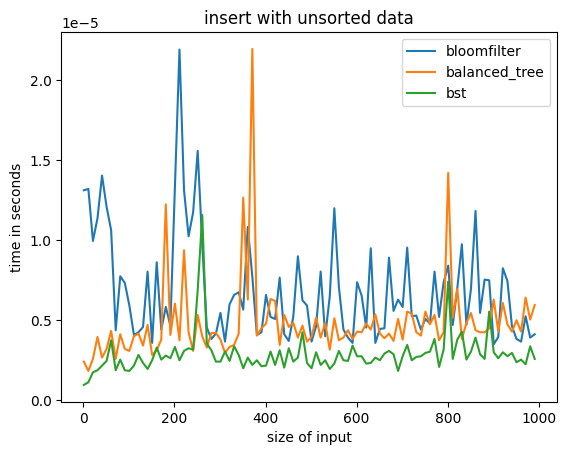

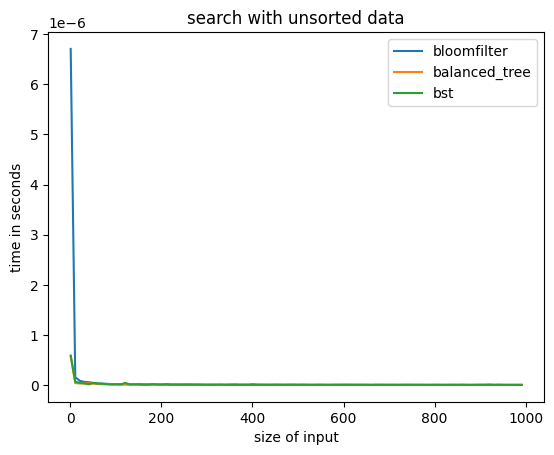

____________________________________________________


In [22]:
import timeit
import random
iterations= 1
data_generator = TestDataGenerator(length=5)
datastuctures = {"bloomfilter": BloomFilterSet, "balanced_tree": BalancedSearchTreeSet, "bst": BinarySearchTreeSet }
test_type = {"unsorted":data_generator.generateData, "sorted":data_generator.generateSorted  ,"median": data_generator.generateBestCaseBinary, "rev_sorted": data_generator.generateReverseSorted}
created_dst={}
count = 1000
step =10

def insert(key, list):
    data_structure = datastuctures[key]()
    for word in list:
            data_structure.insertElement(word)
    created_dst[key] = data_structure

def search(key, list):
    for word in list:
        dst = created_dst[key]
        if (dst.searchElement(word)):
            pass
        else:
            pass

def test_unsorted():
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": []}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": []}
    for i in range(1,count, step):
        list = data_generator.generateData(i)
        search_list = list.copy()
        random.shuffle(search_list)
        insert_word = data_generator.generateData(1)[0]
        search_word = search_list[0]
        for key in datastuctures:
            insert(key, list)
            created_dst[key].searchElement(search_word)
            insertion_time = timeit.timeit(lambda: created_dst[key].insertElement(insert_word), number=iterations)
            times_insert[key].append(insertion_time/(iterations))
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: created_dst[key].searchElement(search_word), number=iterations)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            times_search[key].append(search_time/(iterations*i))
            print("____________________________________________________")
    graph(times_insert, "insert with unsorted data",count,step)
    graph(times_search, "search with unsorted data",count, step)
test_unsorted()      
print("____________________________________________________")


def test_sorted():
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(10,count, step):
        list = data_generator.generateSorted(i)
        search_list = list.copy()
        random.shuffle(search_list)
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: search(key, search_list), number=iterations)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            times_search[key].append(search_time/iterations)
            print("____________________________________________________")
    graph(times_insert, "insert with sorted data",count, step)
    graph(times_search, "search with sorted data",count, step)
# test_sorted()
def test_reverse_sorted():
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(10,count, step):
        list = data_generator.generateReverseSorted(i)
        search_list = list.copy()
        random.shuffle(search_list)
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: search(key, list), number=iterations)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            times_search[key].append(search_time/iterations)
            print("____________________________________________________")
    graph(times_insert, "insert with reverse sorted data",count, step)
    graph(times_search, "search with reverse sorted data",count, step)
# test_reverse_sorted()
def test_median_binary():
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(10,count, step):
        list = data_generator.generateBestCaseBinary(i)
        search_list = list.copy()
        random.shuffle(search_list)
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: search(key, search_list), number=iterations)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            times_search[key].append(search_time/iterations)
            print("____________________________________________________")
    graph(times_insert, "insert with median sorted data",count, step)
    graph(times_search, "search with median sorted data",count, step)
# test_median_binary()

def test_duplicates():
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(100,count, step):
        list = data_generator.generateDuplicateData(i)
        search_list = list.copy()
        random.shuffle(search_list)
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: search(key, search_list), number=iterations)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            times_search[key].append(search_time/iterations)
            print("____________________________________________________")
    graph(times_insert, "insert with duplicates data",count, step)
    graph(times_search, "search with duplicates data",count, step)
# test_duplicates()

def test_per_dst():
    for key in datastuctures:
        times_insert={"unsorted":[], "sorted":[]  ,"median": [], "rev_sorted":[]}
        times_search={"unsorted":[], "sorted":[]  ,"median": [], "rev_sorted":[]}
        for i in range(10,count, step):
            for test in test_type:
                list = test_type[test](i)
                search_list = list.copy()
                random.shuffle(search_list)
                insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
                times_insert[test].append(insertion_time/iterations)
                print("Inserting " + str(test)+ " strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
                search_time = timeit.timeit(lambda: search(key, search_list), number=iterations)
                print("Searching " + str(test)+ " strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
                times_search[test].append(search_time/iterations)
                print("____________________________________________________")
        graph(times_insert, "insert with "+ str(key),count)
        graph(times_search, "search with  "+ str(key),count)
# test_per_dst()

In [ ]:
import matplotlib.pyplot as plt
def graph(data, title,n):
    plt.title(title)
    plt.xlabel("size of filter")
    plt.ylabel("time in seconds")
    for key in data:
        plt.plot([i for i in range(1000,n)], data[key], label=key)
    plt.legend()
    plt.show()

In [ ]:
def insert(data_structure, list):
    for word in list:
            data_structure.insertElement(word)

def search(dst, list):
    for word in list:
        if (dst.searchElement(word)):
            pass
        else:
            pass

class BloomFilterSettest(AbstractSet):
    
    def __init__(self,hash_count,size):
        # ADD YOUR CODE HERE
        self.size = size
        self.hash_count = hash_count
        self.bit_array = [0] * self.size
        self.hash_functions = self.generate_hash_functions()
    
    def generate_hash_functions(self): # Code to generate a list of unique hash functions
            hash_fuctions = []
            for i in range(1,self.hash_count+1):
                hash_fuctions.append(self.generate_hash_function(i))
            return hash_fuctions
    
    def generate_hash_function(self,seed): # Code to generate a unique hash function based on an inputed seed value
        def hash_function(value):
            return hash(value + str(seed)) % self.size
        return hash_function
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        for hash_function in self.hash_functions:
            self.bit_array[hash_function(element)] = 1
        inserted = True
        
        return inserted

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        for hash_function in self.hash_functions:
            if self.bit_array[hash_function(element)] == 0:
                return found
        found = True
        return found    

Inserting into bloom filter of size 10000 took 0.0003310828469693661 seconds
Searching into bloom filter of size 10000 took 0.0003310828469693661 seconds
____________________________________________________
Inserting into bloom filter of size 20000 took 0.00030112499371171 seconds
Searching into bloom filter of size 20000 took 0.00030112499371171 seconds
____________________________________________________
Inserting into bloom filter of size 30000 took 0.0003141670022159815 seconds
Searching into bloom filter of size 30000 took 0.0003141670022159815 seconds
____________________________________________________
Inserting into bloom filter of size 40000 took 0.00030016619712114334 seconds
Searching into bloom filter of size 40000 took 0.00030016619712114334 seconds
____________________________________________________
Inserting into bloom filter of size 50000 took 0.0003475840203464031 seconds
Searching into bloom filter of size 50000 took 0.0003475840203464031 seconds
____________________

Inserting into bloom filter of size 960000 took 0.00033766613341867924 seconds
Searching into bloom filter of size 960000 took 0.00033766613341867924 seconds
____________________________________________________
Inserting into bloom filter of size 970000 took 0.0002999589778482914 seconds
Searching into bloom filter of size 970000 took 0.0002999589778482914 seconds
____________________________________________________
Inserting into bloom filter of size 980000 took 0.00030683306977152824 seconds
Searching into bloom filter of size 980000 took 0.00030683306977152824 seconds
____________________________________________________
Inserting into bloom filter of size 990000 took 0.00030341697856783867 seconds
Searching into bloom filter of size 990000 took 0.00030341697856783867 seconds
____________________________________________________
Inserting into bloom filter of size 1000000 took 0.000313374912366271 seconds
Searching into bloom filter of size 1000000 took 0.000313374912366271 seconds
__

Inserting into bloom filter of size 1930000 took 0.00035704090259969234 seconds
Searching into bloom filter of size 1930000 took 0.00035704090259969234 seconds
____________________________________________________
Inserting into bloom filter of size 1940000 took 0.0003438747953623533 seconds
Searching into bloom filter of size 1940000 took 0.0003438747953623533 seconds
____________________________________________________
Inserting into bloom filter of size 1950000 took 0.00035149999894201756 seconds
Searching into bloom filter of size 1950000 took 0.00035149999894201756 seconds
____________________________________________________
Inserting into bloom filter of size 1960000 took 0.00035679200664162636 seconds
Searching into bloom filter of size 1960000 took 0.00035679200664162636 seconds
____________________________________________________
Inserting into bloom filter of size 1970000 took 0.0003564169164747 seconds
Searching into bloom filter of size 1970000 took 0.0003564169164747 second

Inserting into bloom filter of size 2850000 took 0.00041562505066394806 seconds
Searching into bloom filter of size 2850000 took 0.00041562505066394806 seconds
____________________________________________________
Inserting into bloom filter of size 2860000 took 0.0003911249805241823 seconds
Searching into bloom filter of size 2860000 took 0.0003911249805241823 seconds
____________________________________________________
Inserting into bloom filter of size 2870000 took 0.00039525004103779793 seconds
Searching into bloom filter of size 2870000 took 0.00039525004103779793 seconds
____________________________________________________
Inserting into bloom filter of size 2880000 took 0.00037341704592108727 seconds
Searching into bloom filter of size 2880000 took 0.00037341704592108727 seconds
____________________________________________________
Inserting into bloom filter of size 2890000 took 0.000401749974116683 seconds
Searching into bloom filter of size 2890000 took 0.000401749974116683 se

Inserting into bloom filter of size 3710000 took 0.0006147909443825483 seconds
Searching into bloom filter of size 3710000 took 0.0006147909443825483 seconds
____________________________________________________
Inserting into bloom filter of size 3720000 took 0.00039362511597573757 seconds
Searching into bloom filter of size 3720000 took 0.00039362511597573757 seconds
____________________________________________________
Inserting into bloom filter of size 3730000 took 0.00040308316238224506 seconds
Searching into bloom filter of size 3730000 took 0.00040308316238224506 seconds
____________________________________________________
Inserting into bloom filter of size 3740000 took 0.00040695792995393276 seconds
Searching into bloom filter of size 3740000 took 0.00040695792995393276 seconds
____________________________________________________
Inserting into bloom filter of size 3750000 took 0.00041733309626579285 seconds
Searching into bloom filter of size 3750000 took 0.0004173330962657928

Searching into bloom filter of size 4270000 took 0.0004497920162975788 seconds
____________________________________________________
Inserting into bloom filter of size 4280000 took 0.0004397910088300705 seconds
Searching into bloom filter of size 4280000 took 0.0004397910088300705 seconds
____________________________________________________
Inserting into bloom filter of size 4290000 took 0.0004324160981923342 seconds
Searching into bloom filter of size 4290000 took 0.0004324160981923342 seconds
____________________________________________________
Inserting into bloom filter of size 4300000 took 0.0004180409014225006 seconds
Searching into bloom filter of size 4300000 took 0.0004180409014225006 seconds
____________________________________________________
Inserting into bloom filter of size 4310000 took 0.00043966597877442837 seconds
Searching into bloom filter of size 4310000 took 0.00043966597877442837 seconds
____________________________________________________
Inserting into bloom f

Inserting into bloom filter of size 4840000 took 0.0004505410324782133 seconds
Searching into bloom filter of size 4840000 took 0.0004505410324782133 seconds
____________________________________________________
Inserting into bloom filter of size 4850000 took 0.00042641698382794857 seconds
Searching into bloom filter of size 4850000 took 0.00042641698382794857 seconds
____________________________________________________
Inserting into bloom filter of size 4860000 took 0.00043629202991724014 seconds
Searching into bloom filter of size 4860000 took 0.00043629202991724014 seconds
____________________________________________________
Inserting into bloom filter of size 4870000 took 0.000442249933257699 seconds
Searching into bloom filter of size 4870000 took 0.000442249933257699 seconds
____________________________________________________
Inserting into bloom filter of size 4880000 took 0.0004244579467922449 seconds
Searching into bloom filter of size 4880000 took 0.0004244579467922449 seco

Inserting into bloom filter of size 5290000 took 0.0014435420744121075 seconds
Searching into bloom filter of size 5290000 took 0.0014435420744121075 seconds
____________________________________________________
Inserting into bloom filter of size 5300000 took 0.0010916250757873058 seconds
Searching into bloom filter of size 5300000 took 0.0010916250757873058 seconds
____________________________________________________
Inserting into bloom filter of size 5310000 took 0.0004787081852555275 seconds
Searching into bloom filter of size 5310000 took 0.0004787081852555275 seconds
____________________________________________________
Inserting into bloom filter of size 5320000 took 0.0010453748982399702 seconds
Searching into bloom filter of size 5320000 took 0.0010453748982399702 seconds
____________________________________________________
Inserting into bloom filter of size 5330000 took 0.00046412483789026737 seconds
Searching into bloom filter of size 5330000 took 0.00046412483789026737 seco

Inserting into bloom filter of size 5880000 took 0.0004508751444518566 seconds
Searching into bloom filter of size 5880000 took 0.0004508751444518566 seconds
____________________________________________________
Inserting into bloom filter of size 5890000 took 0.0004407919477671385 seconds
Searching into bloom filter of size 5890000 took 0.0004407919477671385 seconds
____________________________________________________
Inserting into bloom filter of size 5900000 took 0.00045383395627141 seconds
Searching into bloom filter of size 5900000 took 0.00045383395627141 seconds
____________________________________________________
Inserting into bloom filter of size 5910000 took 0.0004799170419573784 seconds
Searching into bloom filter of size 5910000 took 0.0004799170419573784 seconds
____________________________________________________
Inserting into bloom filter of size 5920000 took 0.00048095802776515484 seconds
Searching into bloom filter of size 5920000 took 0.00048095802776515484 seconds


Inserting into bloom filter of size 6280000 took 0.0011657499708235264 seconds
Searching into bloom filter of size 6280000 took 0.0011657499708235264 seconds
____________________________________________________
Inserting into bloom filter of size 6290000 took 0.001021499978378415 seconds
Searching into bloom filter of size 6290000 took 0.001021499978378415 seconds
____________________________________________________
Inserting into bloom filter of size 6300000 took 0.0014351659920066595 seconds
Searching into bloom filter of size 6300000 took 0.0014351659920066595 seconds
____________________________________________________
Inserting into bloom filter of size 6310000 took 0.001328915823251009 seconds
Searching into bloom filter of size 6310000 took 0.001328915823251009 seconds
____________________________________________________
Inserting into bloom filter of size 6320000 took 0.0014268748927861452 seconds
Searching into bloom filter of size 6320000 took 0.0014268748927861452 seconds
__

Inserting into bloom filter of size 6670000 took 0.0003510829992592335 seconds
Searching into bloom filter of size 6670000 took 0.0003510829992592335 seconds
____________________________________________________
Inserting into bloom filter of size 6680000 took 0.00035616615787148476 seconds
Searching into bloom filter of size 6680000 took 0.00035616615787148476 seconds
____________________________________________________
Inserting into bloom filter of size 6690000 took 0.00035037496127188206 seconds
Searching into bloom filter of size 6690000 took 0.00035037496127188206 seconds
____________________________________________________
Inserting into bloom filter of size 6700000 took 0.00035020802170038223 seconds
Searching into bloom filter of size 6700000 took 0.00035020802170038223 seconds
____________________________________________________
Inserting into bloom filter of size 6710000 took 0.00034662499092519283 seconds
Searching into bloom filter of size 6710000 took 0.0003466249909251928

Searching into bloom filter of size 7320000 took 0.0003493749536573887 seconds
____________________________________________________
Inserting into bloom filter of size 7330000 took 0.0003512499388307333 seconds
Searching into bloom filter of size 7330000 took 0.0003512499388307333 seconds
____________________________________________________
Inserting into bloom filter of size 7340000 took 0.00035474984906613827 seconds
Searching into bloom filter of size 7340000 took 0.00035474984906613827 seconds
____________________________________________________
Inserting into bloom filter of size 7350000 took 0.00035816687159240246 seconds
Searching into bloom filter of size 7350000 took 0.00035816687159240246 seconds
____________________________________________________
Inserting into bloom filter of size 7360000 took 0.0003460829611867666 seconds
Searching into bloom filter of size 7360000 took 0.0003460829611867666 seconds
____________________________________________________
Inserting into bloom

Inserting into bloom filter of size 7760000 took 0.0011664170306175947 seconds
Searching into bloom filter of size 7760000 took 0.0011664170306175947 seconds
____________________________________________________
Inserting into bloom filter of size 7770000 took 0.0003709159791469574 seconds
Searching into bloom filter of size 7770000 took 0.0003709159791469574 seconds
____________________________________________________
Inserting into bloom filter of size 7780000 took 0.000354791060090065 seconds
Searching into bloom filter of size 7780000 took 0.000354791060090065 seconds
____________________________________________________
Inserting into bloom filter of size 7790000 took 0.00035300012677907944 seconds
Searching into bloom filter of size 7790000 took 0.00035300012677907944 seconds
____________________________________________________
Inserting into bloom filter of size 7800000 took 0.0003566672094166279 seconds
Searching into bloom filter of size 7800000 took 0.0003566672094166279 second

Inserting into bloom filter of size 8350000 took 0.0006772500928491354 seconds
Searching into bloom filter of size 8350000 took 0.0006772500928491354 seconds
____________________________________________________
Inserting into bloom filter of size 8360000 took 0.00047133397310972214 seconds
Searching into bloom filter of size 8360000 took 0.00047133397310972214 seconds
____________________________________________________
Inserting into bloom filter of size 8370000 took 0.00046175019815564156 seconds
Searching into bloom filter of size 8370000 took 0.00046175019815564156 seconds
____________________________________________________
Inserting into bloom filter of size 8380000 took 0.00049045798368752 seconds
Searching into bloom filter of size 8380000 took 0.00049045798368752 seconds
____________________________________________________
Inserting into bloom filter of size 8390000 took 0.0004896658938378096 seconds
Searching into bloom filter of size 8390000 took 0.0004896658938378096 second

Inserting into bloom filter of size 8900000 took 0.0011633748654276133 seconds
Searching into bloom filter of size 8900000 took 0.0011633748654276133 seconds
____________________________________________________
Inserting into bloom filter of size 8910000 took 0.0013873330317437649 seconds
Searching into bloom filter of size 8910000 took 0.0013873330317437649 seconds
____________________________________________________
Inserting into bloom filter of size 8920000 took 0.000366083113476634 seconds
Searching into bloom filter of size 8920000 took 0.000366083113476634 seconds
____________________________________________________
Inserting into bloom filter of size 8930000 took 0.00036508403718471527 seconds
Searching into bloom filter of size 8930000 took 0.00036508403718471527 seconds
____________________________________________________
Inserting into bloom filter of size 8940000 took 0.00036170799285173416 seconds
Searching into bloom filter of size 8940000 took 0.00036170799285173416 seco

Inserting into bloom filter of size 9490000 took 0.0004898749757558107 seconds
Searching into bloom filter of size 9490000 took 0.0004898749757558107 seconds
____________________________________________________
Inserting into bloom filter of size 9500000 took 0.0004935830365866423 seconds
Searching into bloom filter of size 9500000 took 0.0004935830365866423 seconds
____________________________________________________
Inserting into bloom filter of size 9510000 took 0.0004784159827977419 seconds
Searching into bloom filter of size 9510000 took 0.0004784159827977419 seconds
____________________________________________________
Inserting into bloom filter of size 9520000 took 0.000518792076036334 seconds
Searching into bloom filter of size 9520000 took 0.000518792076036334 seconds
____________________________________________________
Inserting into bloom filter of size 9530000 took 0.0005046669393777847 seconds
Searching into bloom filter of size 9530000 took 0.0005046669393777847 seconds


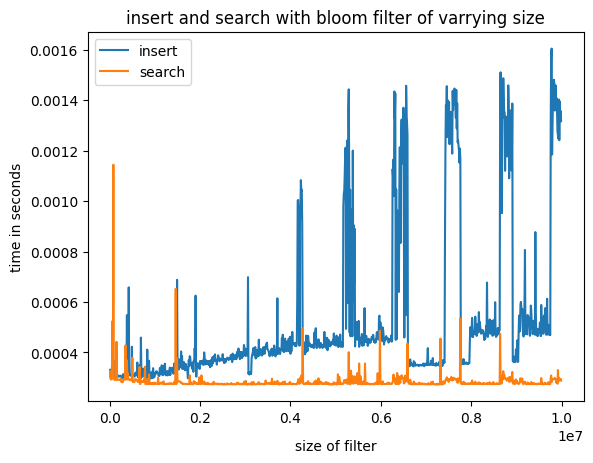

Inserting into bloom filter with 1 hashes  took 0.0002993331290781498 seconds
Searching into bloom filter with 1 hashes  took 0.0002993331290781498 seconds
____________________________________________________
Inserting into bloom filter with 1001 hashes  took 0.22739245905540884 seconds
Searching into bloom filter with 1001 hashes  took 0.22739245905540884 seconds
____________________________________________________
Inserting into bloom filter with 2001 hashes  took 0.41198758292011917 seconds
Searching into bloom filter with 2001 hashes  took 0.41198758292011917 seconds
____________________________________________________
Inserting into bloom filter with 3001 hashes  took 0.6182610420510173 seconds
Searching into bloom filter with 3001 hashes  took 0.6182610420510173 seconds
____________________________________________________
Inserting into bloom filter with 4001 hashes  took 0.8162710829637945 seconds
Searching into bloom filter with 4001 hashes  took 0.8162710829637945 seconds
____

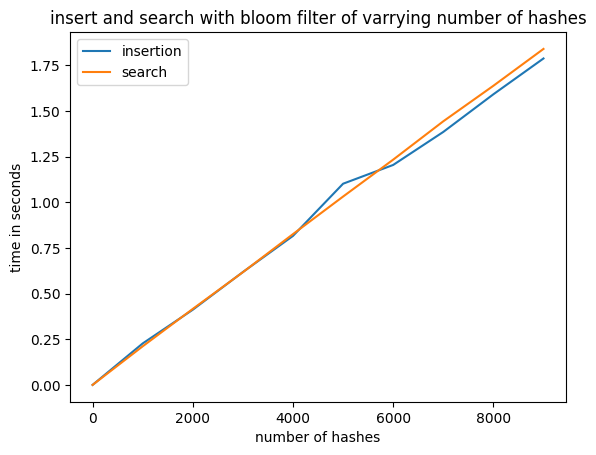

In [ ]:
import timeit
import matplotlib.pyplot as plt
import random
data_size = 1000
count = data_size
iterations = 1
def test_bloom_size():
    data_generator= TestDataGenerator()
    sizes = [str(i) for i in range(10000,10000000,10000)]
    times_insert=[]
    times_search=[]
    list = data_generator.generateData(1000)
    search_list = list.copy()
    random.shuffle(search_list)
    for size in sizes:
        bf = BloomFilterSettest(1,int(size))
        insert_time = timeit.timeit(lambda: insert(bf, list), number=iterations)
        times_insert.append(insert_time/iterations)
        print("Inserting into bloom filter of size " + size + " took " + str(insert_time/iterations) + " seconds")
        search_time = timeit.timeit(lambda: search(bf, search_list), number=iterations)
        print("Searching into bloom filter of size " + size + " took " + str(insert_time/iterations) + " seconds")
        times_search.append(search_time/iterations)
        print("____________________________________________________")
    plt.title("insert and search with bloom filter of varrying size")
    plt.xlabel("size of filter", labelpad=10)
    plt.ylabel("time in seconds")
    plt.plot([int(i) for i in sizes], times_insert, label="insert")
    plt.plot([int(i) for i in sizes], times_search, label="search")
    plt.legend()
    plt.show()

    
def test_bloom_hashes():
    data_generator= TestDataGenerator()
    number = [str(i) for i in range(1,10000,1000)]
    times_insert=[]
    times_search=[]
    list = data_generator.generateData(1000)
    search_list = list.copy()
    random.shuffle(search_list)
    for size in number:
        bf = BloomFilterSettest(int(size), 100000)
        insert_time = timeit.timeit(lambda: insert(bf, list), number=iterations)
        times_insert.append(insert_time/iterations)
        print("Inserting into bloom filter with " + size + " hashes "+" took " + str(insert_time/iterations) + " seconds")
        search_time = timeit.timeit(lambda: search(bf, search_list), number=iterations)
        print("Searching into bloom filter with " + size + " hashes "+" took " + str(insert_time/iterations) + " seconds")
        times_search.append(search_time/iterations)
        print("____________________________________________________")
    plt.title("insert and search with bloom filter of varrying number of hashes")
    plt.xlabel("number of hashes")
    plt.ylabel("time in seconds")
    plt.plot([int(i) for i in number], times_insert, label="insertion")
    plt.plot([int(i) for i in number], times_search, label= "search")
    plt.legend()
    plt.show()
    
  
    
    
    
test_bloom_size()
test_bloom_hashes()